In [2]:
%matplotlib nbagg
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr, sem
from scipy import signal
from ipyparallel import Client
from ipyparallel import depend, require, dependent
from mpl_toolkits.mplot3d import Axes3D
from shutil import copyfile

#Shape of the data
height = 256
width = 256



In [3]:
# AUTOMATIC EXPERIMENT SELECTOR
directory = "/media/gu4n1n3/Data/2_mice/20170822/"
folder = "cm"
import os
from os.path import join, getsize
cm_files = []
ncm_files = []
label_file = ""
for root, dirs, files in os.walk(directory):
    if not "Behaviour" in root:
        for file in files:
            if ".npy" in file:
                if "the" not in file:
                    if "non" in file:
                        ncm_files.append(root+"/"+file)
                    else:
                        if "no_block" in file:
                            cm_files.append(root+"/"+file)
                else:
                    if "labels" in file:
                        label_file = (root+"/"+file)
        
print(np.shape(ncm_files))
print(np.shape(cm_files))
print(label_file)

(28,)
(43,)
/media/gu4n1n3/Data/2_mice/20170822/Experiment_75/the_seed_labels.npy


In [5]:
ncm_matrices = []
for ncm_file in ncm_files:
    mat = np.load(ncm_file)
    ncm_matrices.append(mat)
    

cm_matrices = []
for cm_file in cm_files:
    mat = np.load(cm_file)
    cm_matrices.append(mat)
    src = cm_file.replace(".npy", ".svg")
    dest = cm_file.split("/")
    dest[6] = folder
    dest = "/".join(dest)
    dest = dest.replace('.npy', ".svg")
    copyfile(src, dest)
    
# calculate average'
#print(np.shape(ncm_matrices))
ncm_mean = np.mean(ncm_matrices, axis=0)
cm_mean = np.mean(cm_matrices, axis=0)

ncm_sem = np.std(ncm_matrices, axis=0)
cm_sem = np.std(cm_matrices, axis=0)

#Load Lables
the_labels = np.load(label_file)
n_lables = np.size(the_labels)
print(the_labels)
print(n_lables)

/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


FileNotFoundError: [Errno 2] No such file or directory: ''

/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py

<IPython.core.display.Javascript object>


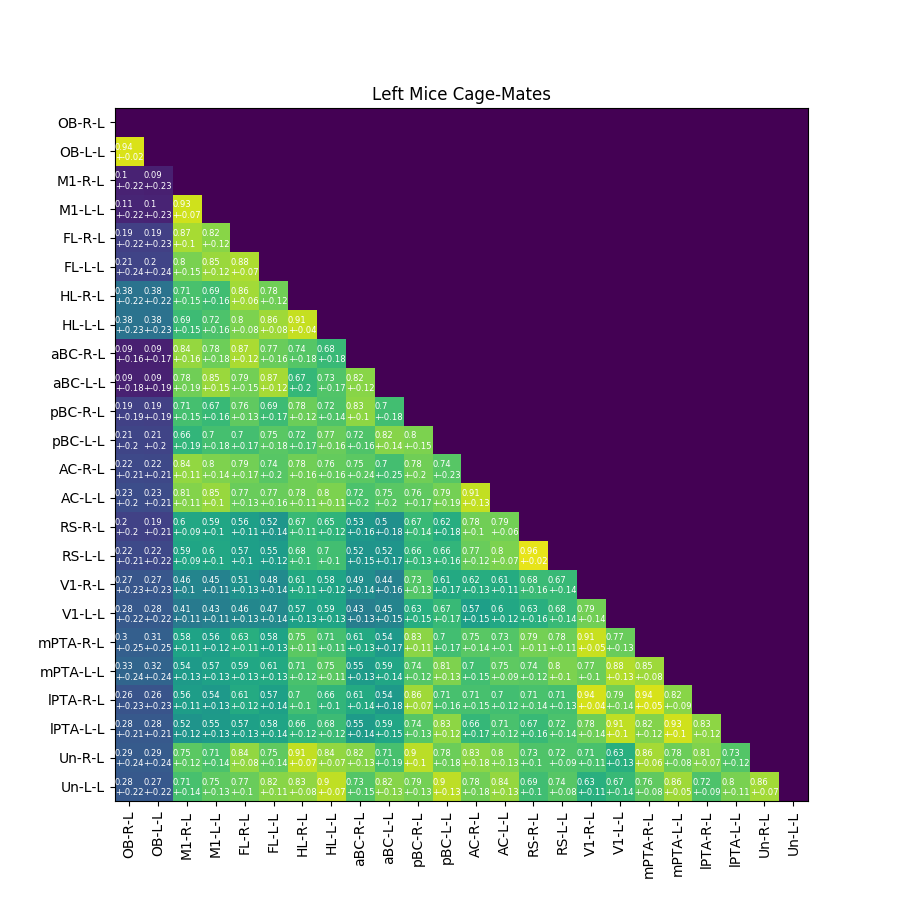

<IPython.core.display.Javascript object>


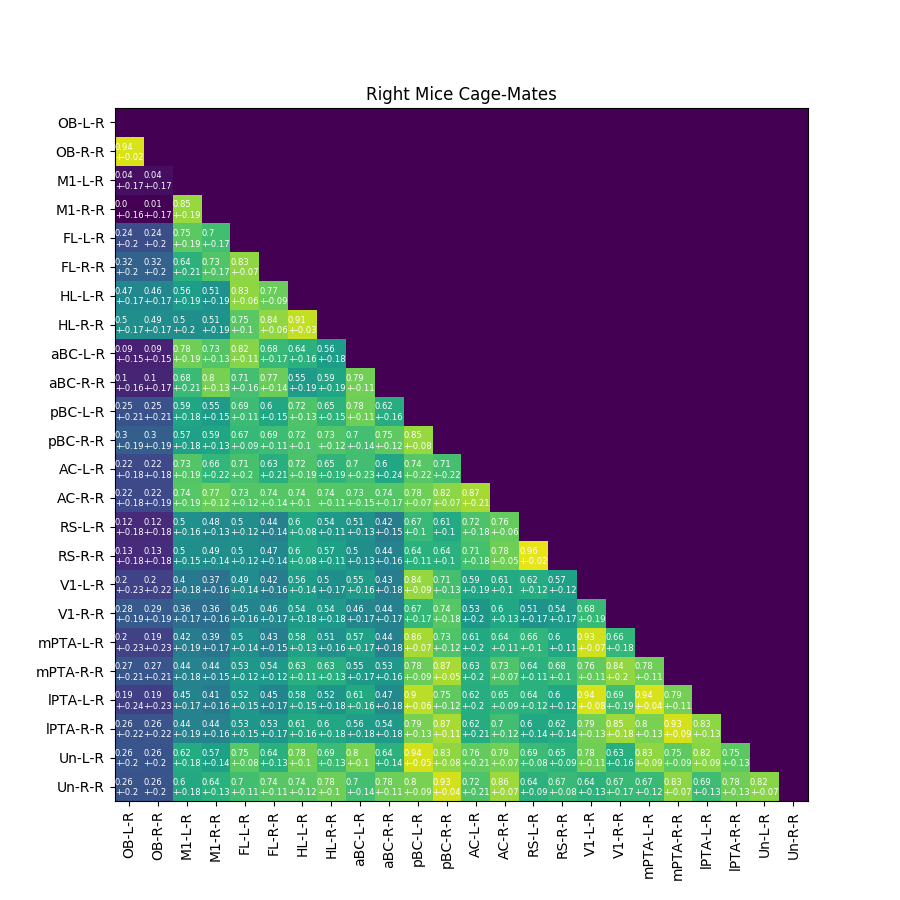

<IPython.core.display.Javascript object>


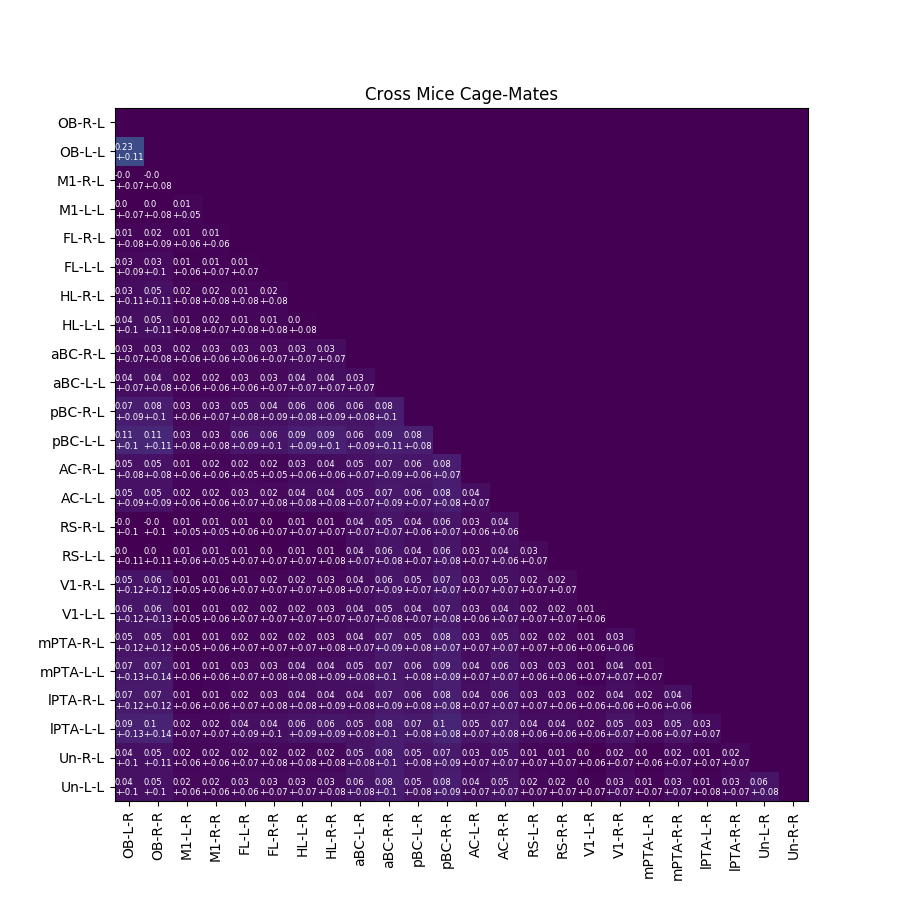

In [24]:
left_mouse_cm_mean = cm_mean[:n_lables/2,:n_lables/2]
right_mouse_cm_mean = cm_mean[n_lables/2:,n_lables/2:]
cross_mouse_cm_mean = cm_mean[:n_lables/2, n_lables/2:]

left_mouse_cm_sem = cm_sem[:n_lables/2,:n_lables/2]
right_mouse_cm_sem = cm_sem[n_lables/2:,n_lables/2:]
cross_mouse_cm_sem = cm_sem[:n_lables/2, n_lables/2:]

plt.figure(figsize=(9, 9))
plt.imshow(np.tril(left_mouse_cm_mean, -1), vmin=0, vmax=1)
plt.title("Left Mice Cage-Mates")
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[:n_lables//2], rotation='vertical')
plt.yticks(ticks, the_labels[:n_lables//2])
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(left_mouse_cm_mean[i, j],2))+"\n+-"+str(np.round(left_mouse_cm_sem[i, j],2)), 
                 fontsize=6,
                 color='white')
plt.savefig(directory+"left_mice_cage_mates.png")    

plt.figure(figsize=(9, 9))
plt.imshow(np.tril(right_mouse_cm_mean, -1), vmin=0, vmax=1)
plt.title("Right Mice Cage-Mates")
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[n_lables//2:], rotation='vertical')
plt.yticks(ticks, the_labels[n_lables//2:])
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(right_mouse_cm_mean[i, j],2))+"\n+-"+str(np.round(right_mouse_cm_sem[i, j],2)), 
                 fontsize=6,
                 color='white')
plt.savefig(directory+"right_mice_cage_mates.png")

plt.figure(figsize=(9, 9))
plt.imshow(np.tril(cross_mouse_cm_mean, -1), vmin=0, vmax=1)
plt.title("Cross Mice Cage-Mates")
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[n_lables//2:], rotation='vertical')
plt.yticks(ticks, the_labels[:n_lables//2])
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(cross_mouse_cm_mean[i, j],2))+"\n+-"+str(np.round(cross_mouse_cm_sem[i, j],2)),
                 fontsize=6,
                 color='white')
plt.savefig(directory+"cross_mice_cage_mates.png")

/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gu4n1n3/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py

<IPython.core.display.Javascript object>


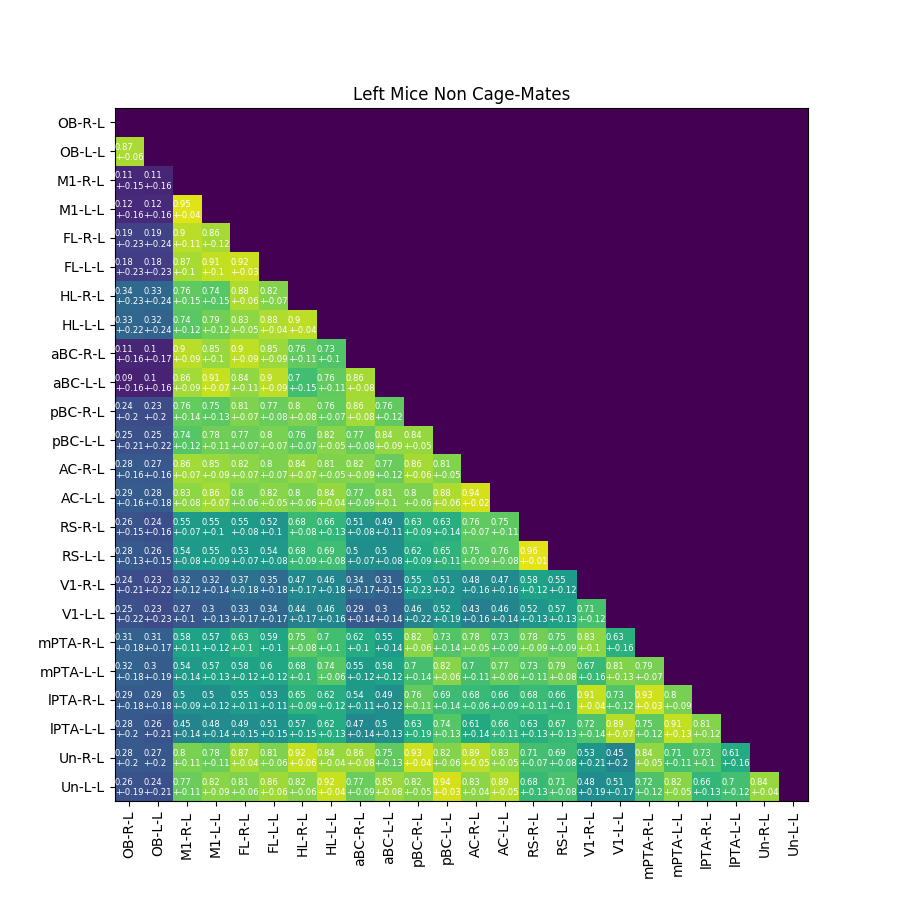

<IPython.core.display.Javascript object>


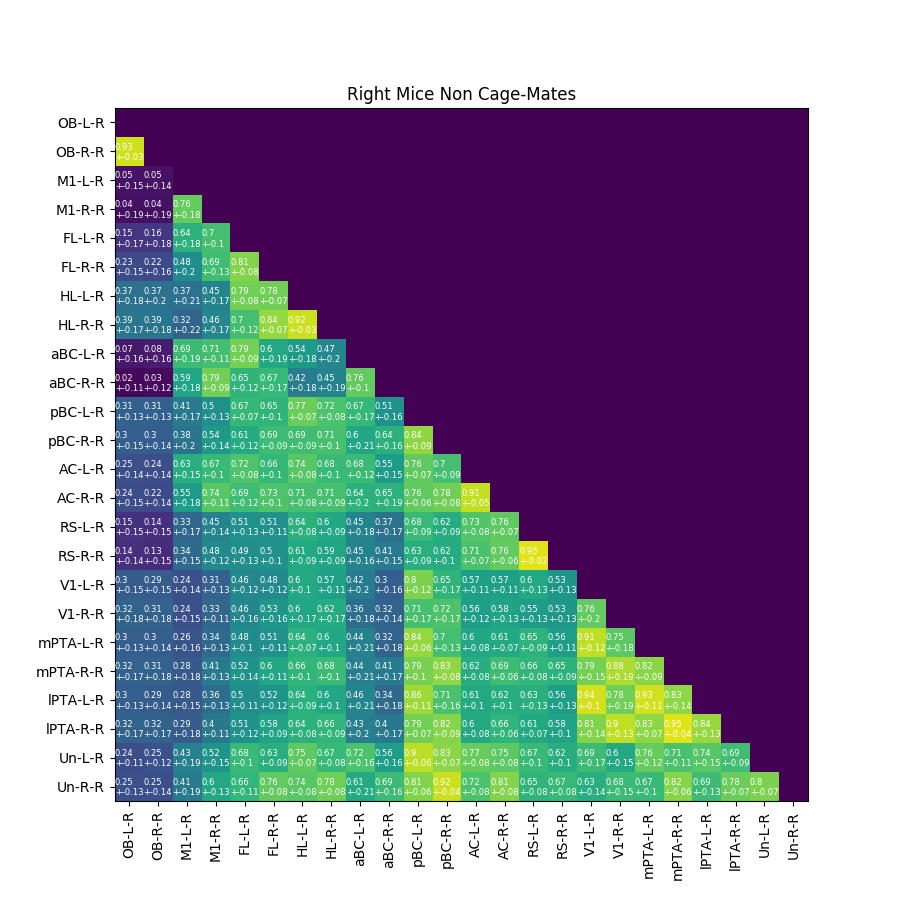

<IPython.core.display.Javascript object>


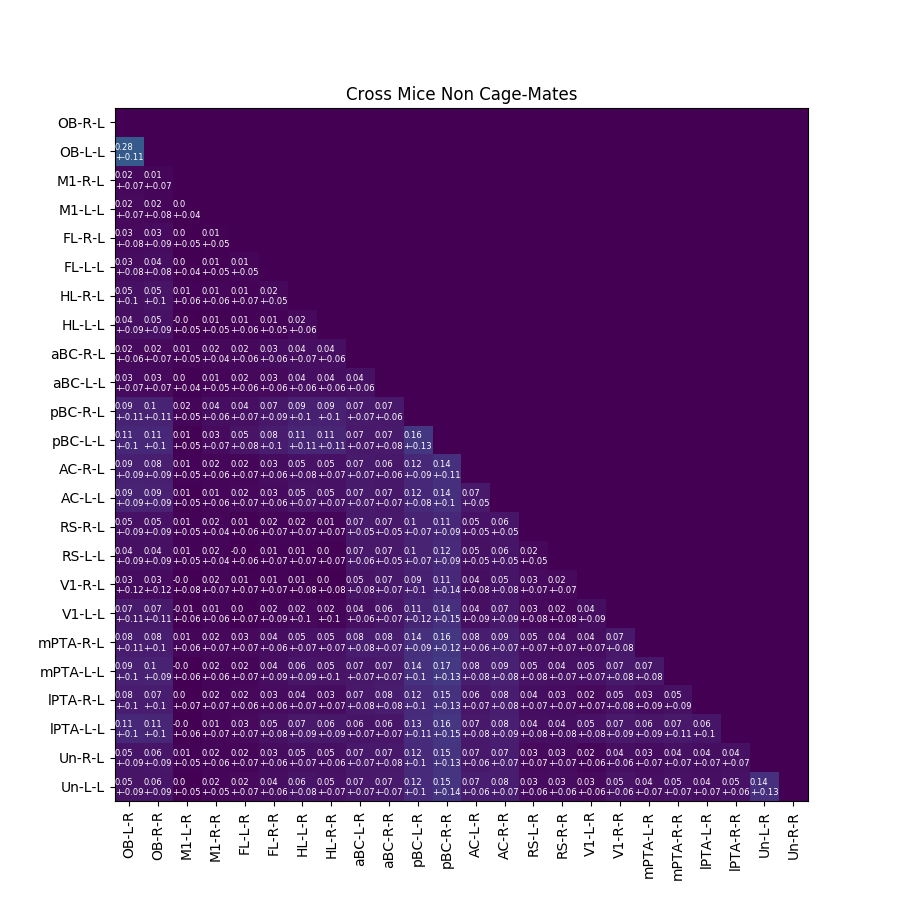

In [25]:
left_mouse_ncm_mean = ncm_mean[:n_lables/2,:n_lables/2]
right_mouse_ncm_mean = ncm_mean[n_lables/2:,n_lables/2:]
cross_mouse_ncm_mean = ncm_mean[:n_lables/2, n_lables/2:]

left_mouse_ncm_sem = ncm_sem[:n_lables/2,:n_lables/2]
right_mouse_ncm_sem = ncm_sem[n_lables/2:,n_lables/2:]
cross_mouse_ncm_sem = ncm_sem[:n_lables/2, n_lables/2:]

plt.figure(figsize=(9, 9))
plt.imshow(np.tril(left_mouse_ncm_mean, -1), vmin=0, vmax=1)
plt.title("Left Mice Non Cage-Mates")
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[:n_lables//2], rotation='vertical')
plt.yticks(ticks, the_labels[:n_lables//2])
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(left_mouse_ncm_mean[i, j],2))+"\n+-"+str(np.round(left_mouse_ncm_sem[i, j],2)), 
                 fontsize=6,
                 color='white')
plt.savefig(directory+"left_mice_non_cage_mates.png")

plt.figure(figsize=(9, 9))
plt.imshow(np.tril(right_mouse_ncm_mean, -1), vmin=0, vmax=1)
plt.title("Right Mice Non Cage-Mates")
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[n_lables//2:], rotation='vertical')
plt.yticks(ticks, the_labels[n_lables//2:])
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(right_mouse_ncm_mean[i, j],2))+"\n+-"+str(np.round(right_mouse_ncm_sem[i, j],2)), 
                 fontsize=6,
                 color='white')
plt.savefig(directory+"right_mice_non_cage_mates.png")

plt.figure(figsize=(9, 9))
plt.imshow(np.tril(cross_mouse_ncm_mean, -1), vmin=0, vmax=1)
plt.title("Cross Mice Non Cage-Mates")
ticks = [i for i in range(n_lables//2)]
plt.xticks(ticks, the_labels[n_lables//2:], rotation='vertical')
plt.yticks(ticks, the_labels[:n_lables//2])
for i in range(n_lables//2):
    for j in range(0, i):
        plt.text(j-0.5, i+0.3, 
                 str(np.round(cross_mouse_ncm_mean[i, j],2))+"\n+-"+str(np.round(cross_mouse_ncm_sem[i, j],2)),
                 fontsize=6,
                 color='white')
plt.savefig(directory+"cross_mice_non_cage_mates.png")

<IPython.core.display.Javascript object>


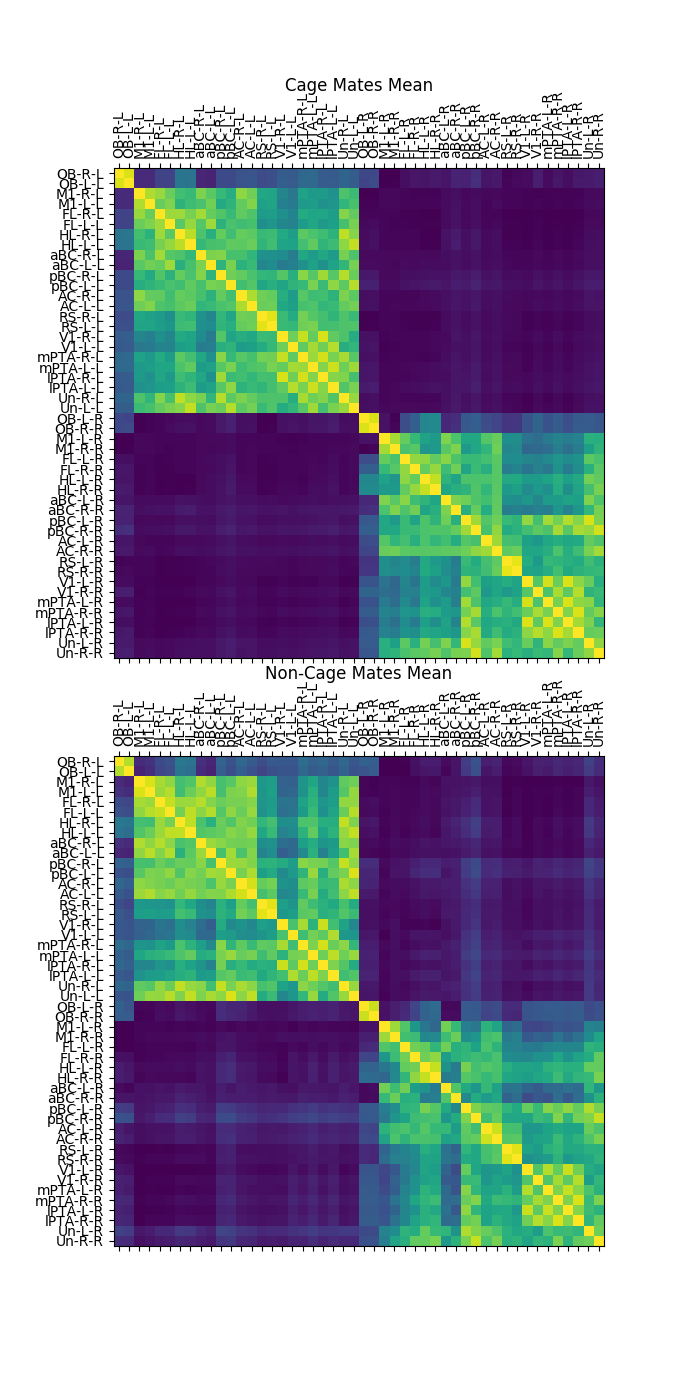

In [10]:
fig, ax = plt.subplots(2,1, figsize=(7,14))
ax[0].matshow(cm_mean, vmin=0, vmax=1, cmap='viridis')
ax[0].set_title("Cage Mates Mean", y=1.14)
ax[0].set_yticks([i for i in range(len(the_labels))])
ax[0].set_xticks([i for i in range(len(the_labels))])
ax[0].set_xticklabels(the_labels, rotation='vertical')
ax[0].set_yticklabels(the_labels)

ax[1].matshow(ncm_mean, vmin=0, vmax=1, cmap='viridis')
ax[1].set_title("Non-Cage Mates Mean", y=1.14)
ax[1].set_yticks([i for i in range(len(the_labels))])
ax[1].set_xticks([i for i in range(len(the_labels))])
ax[1].set_xticklabels(the_labels, rotation='vertical')
ax[1].set_yticklabels(the_labels)
plt.show()

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(7,14))
ax[0].matshow(cm_sem, vmin=0, vmax=0.035, cmap='viridis')
ax[0].set_title("Cage Mates Sem", y=1.14)
ax[0].set_yticks([i for i in range(len(the_labels))])
ax[0].set_xticks([i for i in range(len(the_labels))])
ax[0].set_xticklabels(the_labels, rotation='vertical')
ax[0].set_yticklabels(the_labels)

ax[1].matshow(ncm_sem,  vmin=0, vmax=0.035, cmap='viridis')
ax[1].set_title("Non-Cage Mates Sem", y=1.14)
ax[1].set_yticks([i for i in range(len(the_labels))])
ax[1].set_xticks([i for i in range(len(the_labels))])
ax[1].set_xticklabels(the_labels, rotation='vertical')
ax[1].set_yticklabels(the_labels)

In [ ]:
import cv2
cm_mean_color = cv2.cvtColor(cm_mean.astype(np.float32),cv2.COLOR_GRAY2RGB)
ncm_mean_color = cv2.cvtColor(ncm_mean.astype(np.float32), cv2.COLOR_GRAY2RGB)

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(2, 1, 1, projection='3d')
x0, y0 = np.mgrid[0:cm_mean.shape[0], 0:cm_mean.shape[1]]
ax0.plot_surface(x0, y0, cm_sem, rstride=1, cstride=1, cmap='viridis')

x1, y1 = np.mgrid[0:ncm_mean.shape[0], 0:ncm_mean.shape[1]]
ax1 = fig.add_subplot(2, 1, 2, projection='3d')
ax1.plot_surface(x, y, ncm_sem, rstride=1, cstride=1, cmap='viridis')
ax1.set_zlim()